In [1]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
layers = tf.keras.layers
from tensorflow.contrib import autograph

import numpy as np
import matplotlib.pyplot as plt

tf.enable_eager_execution()

In [2]:
def square_if_positive(x):
    if x > 0:
        x = x * x
    else:
        x = 0.0
    return x

In [3]:
print(autograph.to_code(square_if_positive))

from __future__ import print_function
import tensorflow as tf

def tf__square_if_positive(x):
  try:
    with ag__.function_scope('square_if_positive'):

      def if_true():
        with ag__.function_scope('if_true'):
          x_1, = x,
          x_1 = x_1 * x_1
          return x_1,

      def if_false():
        with ag__.function_scope('if_false'):
          x_2, = x,
          x_2 = 0.0
          return x_2,
      x = ag__.utils.run_cond(tf.greater(x, 0), if_true, if_false)
      return x
  except:
    ag__.rewrite_graph_construction_error(ag_source_map__)



tf__square_if_positive.autograph_info__ = {}



In [4]:
print('Eager results: %2.2f, %2.2f' % (square_if_positive(tf.constant(9.0)),
                                      square_if_positive(tf.constant(-9.0))))

Eager results: 81.00, 0.00


In [5]:
tf_square_if_positive = autograph.to_graph(square_if_positive)

with tf.Graph().as_default():
    g_out1 = tf_square_if_positive(tf.constant(9.0))
    g_out2 = tf_square_if_positive(tf.constant(-9.0))
    with tf.Session() as sess:
        print("Graph results: %2.2f, %2.2f\n" % (sess.run(g_out1), 
                                                  sess.run(g_out2)))

Graph results: 81.00, 0.00



In [6]:
def sum_even(items):
    s = 0
    for c in items:
        if c % 2 > 0:
            continue
        s += c
    return s
print('Eager result: %d' % sum_even(tf.constant([10, 12, 15, 20])))

tf_sum_even = autograph.to_graph(sum_even)

with tf.Graph().as_default(), tf.Session() as sess:
    print("Graph result: %d\n\n" % sess.run(tf_sum_even(tf.constant([10, 12, 15, 20]))))

Eager result: 42
Graph result: 42




In [7]:
print(autograph.to_code(sum_even))

from __future__ import print_function
import tensorflow as tf

def tf__sum_even(items):
  try:
    with ag__.function_scope('sum_even'):
      s = 0

      def extra_test(s_2):
        with ag__.function_scope('extra_test'):
          return True

      def loop_body(loop_vars, s_2):
        with ag__.function_scope('loop_body'):
          c = loop_vars
          continue_ = tf.constant(False)

          def if_true():
            with ag__.function_scope('if_true'):
              continue__1, = continue_,
              continue__1 = tf.constant(True)
              return continue__1,

          def if_false():
            with ag__.function_scope('if_false'):
              return continue_,
          continue_ = ag__.utils.run_cond(tf.greater(c % 2, 0), if_true, if_false)

          def if_true_1():
            with ag__.function_scope('if_true_1'):
              s_1, = s_2,
              s_1 += c
              return s_1,

          def if_false_1():
            with ag__.function_sc

In [8]:
@autograph.convert()
def fizzbuzz(i, n):
    while i < n:
        msg = ''
        if i % 3 == 0:
            msg += 'Fizz'
        if i % 5 == 0:
            msg += 'Buzz'
        if msg == '':
            msg = tf.as_string(i)
        print(msg)
        i += 1
    return i

with tf.Graph().as_default():
    final_i = fizzbuzz(tf.constant(10), tf.constant(16))
    with tf.Session() as sess:
        sess.run(final_i)

Buzz
11
Fizz
13
14
FizzBuzz


In [9]:
@autograph.convert()
def inverse(x):
    assert x != 0.0, 'Do not pass zero!'
    return 1.0 / x

with tf.Graph().as_default(), tf.Session() as sess:
    try:
        print(sess.run(inverse(tf.constant(0.0))))
    except tf.errors.InvalidArgumentError as e:
        print('Got error message:\n %s' % e.message)

Got error message:
 assertion failed: [Do not pass zero!]
	 [[node inverse/Assert/Assert (defined at /var/folders/f5/yns8fq1s48g03ncqddxz0rmm0000gn/T/tmpbofkpaey.py:6)  = Assert[T=[DT_STRING], summarize=3, _device="/job:localhost/replica:0/task:0/device:CPU:0"](inverse/NotEqual, inverse/Assert/Assert/data_0)]]


In [10]:
@autograph.convert()
def count(n):
    i = 0
    while i < n:
        print(i)
        i += 1
    return n

with tf.Graph().as_default(), tf.Session() as sess:
    sess.run(count(tf.constant(5)))

In [11]:
@autograph.convert()
def arange(n):
    z = []
    autograph.set_element_type(z, tf.int32)
    
    for i in tf.range(n):
        z.append(i)
    return autograph.stack(z)

with tf.Graph().as_default(), tf.Session() as sess:
    sess.run(arange(tf.constant(10)))

In [12]:
@autograph.convert()
def nearest_odd_square(x):
    if x > 0:
        x = x * x
        if x % 2 == 0:
            x = x + 1
    return x

with tf.Graph().as_default():
    with tf.Session() as sess:
        print(sess.run(nearest_odd_square(tf.constant(4))))
        print(sess.run(nearest_odd_square(tf.constant(5))))
        print(sess.run(nearest_odd_square(tf.constant(6))))

17
25
37


In [13]:
@autograph.convert()
def square_until_stop(x, y):
    while x < y:
        x = x * x
    return x

with tf.Graph().as_default():
    with tf.Session() as sess:
        print(sess.run(square_until_stop(tf.constant(4), tf.constant(100))))

256


In [14]:
@autograph.convert()
def squares(nums):
    result = []
    autograph.set_element_type(result, tf.int64)
    for num in nums:
        result.append(num * num)
    return autograph.stack(result)

with tf.Graph().as_default():
    with tf.Session() as sess:
        print(sess.run(squares(tf.constant(np.arange(10)))))

[ 0  1  4  9 16 25 36 49 64 81]


In [15]:
@autograph.convert()
def argwhere_cumsum(x, threshold):
    current_sum = 0.0
    idx = 0
    for i in tf.range(len(x)):
        idx = i
        if current_sum >= threshold:
            break
        current_sum += x[i]
    return idx
N = 10
with tf.Graph().as_default():
    with tf.Session() as sess:
        idx = argwhere_cumsum(tf.ones(N), tf.constant(float(N/2)))
        print(sess.run(idx))

5


In [16]:
@autograph.convert()
def collatz(x):
    x = tf.reshape(x, ())
    assert x > 0
    n = tf.convert_to_tensor((0,))
    while not tf.equal(x, 1):
        n += 1
        if tf.equal(x%2, 0):
            x = x // 2
        else:
            x = 3 * x + 1
    return n

with tf.Graph().as_default():
    model = tf.keras.Sequential([
        tf.keras.layers.Lambda(collatz, input_shape=(1,), output_shape=())
    ])
result = model.predict(np.array([6171]))
result

array([261], dtype=int32)

In [3]:
K = tf.keras.backend

class StockasticNetworkDepth(tf.keras.Sequential):
    def __init__(self, pfirst=1.0, plast=0.5, *args, **kwargs):
        self.pfirst = pfirst
        self.plast = plast
        super().__init__(*args, **kwargs)
        
    def build(self, input_shape):
        super().build(input_shape.as_list())
        self.depth = len(self.layers)
        self.plims = np.linspace(self.pfirst, 
                                 self.plast, 
                                 self.depth + 1)[:-1]
    @autograph.convert()
    def call(self, inputs):
        training = tf.cast(K.learning_phase(), dtype=bool)
        if not training:
            count = self.depth
            return super(StockasticNetworkDepth, self).call(inputs), count
        
        p = tf.random_uniform((self.depth,))
        keeps = (p <= self.plims)
        x = inputs
        
        count = tf.reduce_sum(tf.cast(keeps, tf.int32))
        for i in range(self.depth):
            if keeps[i]:
                x = self.layers[i](x)
        return x, count

In [4]:
train_batch = np.random.randn(64, 28, 28, 1).astype(np.float32)

In [5]:
with tf.Graph().as_default() as g:
    model = StockasticNetworkDepth(pfirst=1.0, plast=0.5)
    for n in range(20):
        model.add(layers.Conv2D(filters=16, activation=tf.nn.relu,
                               kernel_size=(3, 3), padding='same'))
    model.build(tf.TensorShape((None, None, None, 1)))
    init = tf.global_variables_initializer()

In [6]:
with tf.Session(graph=g) as sess:
    init.run()
    for phase, name in enumerate(['test', 'train']):
        K.set_learning_phase(phase)
        result, count = model(tf.convert_to_tensor(train_batch, dtype=tf.float32))
        result1, count1 = sess.run((result, count))
        result2, count2 = sess.run((result, count))
        delta = (result1 - result2)
        print(name, "sum abs delta: ", abs(delta).mean())
        print("  layers 1st call: ", count1)
        print("  layers 2st call: ", count2)
        print()

test sum abs delta:  0.0
  layers 1st call:  20
  layers 2st call:  20

train sum abs delta:  0.00077342
  layers 1st call:  16
  layers 2st call:  12



In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [3]:
def mlp_model(input_shape):
    model = tf.keras.Sequential((
        tf.keras.layers.Dense(100, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')))
    model.build()
    return model

def predict(m, x, y):
    y_p = m(tf.reshape(x, (-1, 28 * 28)))
    losses = tf.keras.losses.categorical_crossentropy(y, y_p)
    l = tf.reduce_mean(losses)
    accuracies = tf.keras.metrics.categorical_accuracy(y, y_p)
    accuracy = tf.reduce_mean(accuracies)
    return l, accuracy

def fit(m, x, y, opt):
    l, accuracy = predict(m, x, y)
    opt.minimize(l)
    return l, accuracy

def setup_mnist_data(is_training, batch_size):
    if is_training:
        ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
        ds = ds.shuffle(batch_size * 10)
    else:
        ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
        
    ds = ds.repeat()
    ds = ds.batch(batch_size)
    return ds

def get_next_batch(ds):
    itr = ds.make_one_shot_iterator()
    image, label = itr.get_next()
    x = tf.to_float(image) / 255.0
    y = tf.one_hot(tf.squeeze(label), 10)
    return x, y

In [4]:
@autograph.convert(recursive=True)
def train(train_ds, test_ds, hp):
    m = mlp_model((28 * 28,))
    opt = tf.train.AdamOptimizer(hp.learning_rate)
    
    train_losses = []
    autograph.set_element_type(train_losses, tf.float32)
    test_losses = []
    autograph.set_element_type(test_losses, tf.float32)
    train_accuracies = []
    autograph.set_element_type(train_accuracies, tf.float32)
    test_accuracies = []
    autograph.set_element_type(test_accuracies, tf.float32)
    
    i = tf.constant(0)
    while i < hp.max_steps:
        train_x , train_y = get_next_batch(train_ds)
        test_x, test_y = get_next_batch(test_ds)
        
        step_train_loss, step_train_accuracy = fit(m, train_x, train_y, opt)
        step_test_loss, step_test_accuracy = predict(m, test_x, test_y)
        if i % (hp.max_steps // 10) == 0:
            print('Step', i , 'train loss:', step_train_loss, 'test loss:',
                 step_test_loss, 'train accuracy:', step_train_accuracy,
                 'test accuracy:', step_test_accuracy)
            train_losses.append(step_train_loss)
            test_losses.append(step_test_loss)
            train_accuracies.append(step_train_accuracy)
            test_accuracies.append(step_test_accuracy)
            i += 1
    return (autograph.stack(train_losses), autograph.stack(test_losses),
          autograph.stack(train_accuracies), autograph.stack(test_accuracies))

Step 0 train loss: 2.3296132 test loss: 2.3195236 train accuracy: 0.12 test accuracy: 0.119
Step 50 train loss: 0.4218862 test loss: 0.512168 train accuracy: 0.82 test accuracy: 0.833
Step 100 train loss: 0.550147 test loss: 0.31937623 train accuracy: 0.82 test accuracy: 0.901
Step 150 train loss: 0.18896614 test loss: 0.28412104 train accuracy: 0.94 test accuracy: 0.907
Step 200 train loss: 0.44442832 test loss: 0.28919753 train accuracy: 0.88 test accuracy: 0.902
Step 250 train loss: 0.37856647 test loss: 0.28698784 train accuracy: 0.86 test accuracy: 0.911
Step 300 train loss: 0.14236605 test loss: 0.18872942 train accuracy: 0.96 test accuracy: 0.936
Step 350 train loss: 0.33152893 test loss: 0.21804051 train accuracy: 0.9 test accuracy: 0.932
Step 400 train loss: 0.37663615 test loss: 0.19497588 train accuracy: 0.94 test accuracy: 0.946
Step 450 train loss: 0.19619021 test loss: 0.2192691 train accuracy: 0.92 test accuracy: 0.925


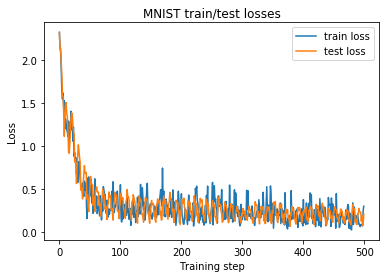

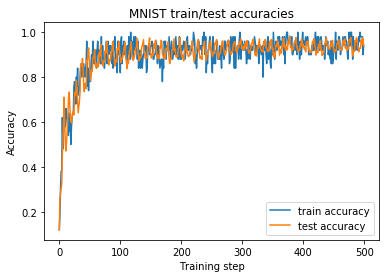

In [5]:
with tf.Graph().as_default() as g:
    hp = tf.contrib.training.HParams(
        learning_rate=0.005,
        max_steps=500,
    )
    train_ds = setup_mnist_data(True, 50)
    test_ds = setup_mnist_data(False, 1000)
    (train_losses, test_losses, train_accuracies,
    test_accuracies) = train(train_ds, test_ds, hp)
    init = tf.global_variables_initializer()
    
with tf.Session(graph=g) as sess:
    sess.run(init)
    (train_losses, test_losses, train_accuracies,
    test_accuracies) = sess.run([train_losses, test_losses, train_accuracies,
                                test_accuracies])
    
plt.title("MNIST train/test losses")
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()

plt.xlabel('Training step')
plt.ylabel('Loss')
plt.show()

plt.title('MNIST train/test accuracies')
plt.plot(train_accuracies, label='train accuracy')
plt.plot(test_accuracies, label='test accuracy')
plt.legend(loc='lower right')
plt.xlabel('Training step')
plt.ylabel('Accuracy')
plt.show()